## 내가 선정한 사회 문제는 **인구 집중**이다.

인구 집중은 환경 문제, 지방소멸 문제, 교통 문제 등 많은 문제의 시작점이 된다.

또한 데이터를 분석할 때 도메인 지식이 중요하기 때문에
내가 평소에 불편하다고 느꼈던 사회 문제를 선정했다.


가설을 세우고 데이터 분석에 들어가기 전에 KOSIS 국가통계포털에서 인구밀도와 총인구 데이터를 가져와 확인해보았다.

In [1]:
import pandas as pd

density_df=pd.read_csv("인구밀도_인구주택총조사기준__20240523095131.csv", encoding='cp949')
population_df=pd.read_csv("총조사인구_2015.csv", encoding='cp949')

In [2]:
density_df.head()

,행정구역별,1966,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2016,2017,2018,2019,2020,2021,2022
0,전국,296.4,320.4,351.1,378.8,408.8,437.7,449.4,463.9,474.5,485.6,509.2,511.0,512.4,514.4,515.7,516.2,515.2,514.6
1,서울특별시,6204.1,9077.8,11475.5,13819.9,15921.1,17532.2,16889.3,16342.2,16221.0,16188.9,16364.0,16202.2,16095.8,15983.7,15926.9,15839.0,15650.1,15560.7
2,부산광역시,3831.4,5534.7,6522.2,7299.9,8088.8,7174.4,5093.1,4820.4,4609.4,4452.3,4479.9,4468.8,4437.4,4409.8,4379.7,4348.9,4316.4,4272.8
3,대구광역시,-,-,-,-,4460.6,4891.1,2766.1,2801.0,2786.5,2767.4,2791.0,2785.3,2776.2,2766.7,2750.3,2728.6,2702.2,2673.7
4,인천광역시,-,-,-,-,6713.0,5731.1,2417.0,2566.2,2546.3,2587.5,2755.5,2741.4,2752.3,2761.4,2776.6,2765.1,2772.8,2801.3


광역시들의 승격된 연도가 다르기 때문에 null값이 생겼고, 세종특별자치시도 2012년에 출범하였기 때문에 2015년의 데이터부터 수집되었다. 경기도와 경상북도의 null값은 이유를 찾지 못했다.

내가 선택한 방법은 모든 데이터를 1975년부터 2022년까지 추이를 살펴보고, null값이 있는 행정구역은 제일 빠른 데이터부터 살펴보기로 하였다. 

In [3]:
#데이터의 그래프를 알아보기 쉽도록 행정구역을 인덱스로 사용하였다.
density_df.set_index('행정구역별', inplace=True)

#1975년도 이후의 데이터만 잘라냈다
density_df = density_df.loc[:, '1975':'2022']

#전국은 우리의 관심사가 아니기 때문에 행을 없애주었다.
density_df = density_df.drop(['전국'])

#데이터의 타입이 혼재되어 있어 그래프가 그려지지 않아서 다 float형식으로 바꿔주었다
density_df = density_df.apply(pd.to_numeric, errors='coerce')

In [4]:
#한글이 깨지지 않도록
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

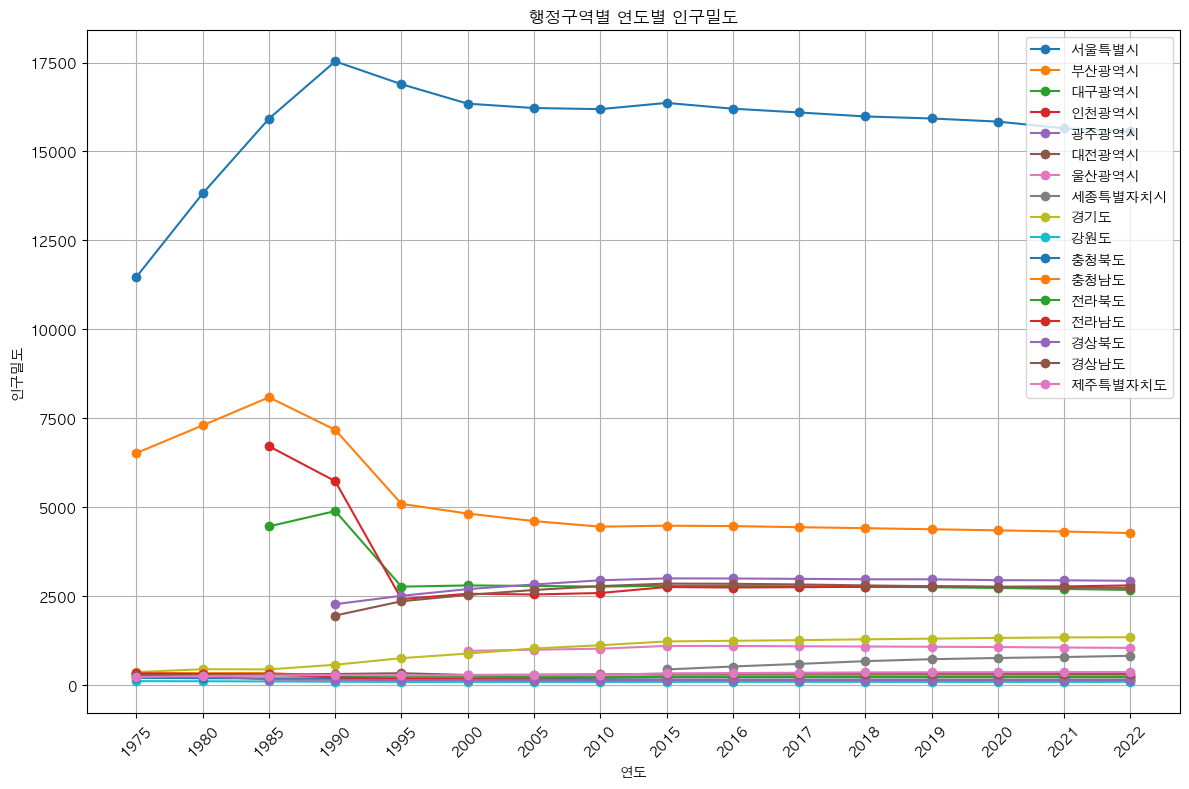

In [5]:
plt.figure(figsize=(12, 8))

for region in density_df.index:
    plt.plot(density_df.columns, density_df.loc[region], marker='o', label=region)

plt.title('행정구역별 연도별 인구밀도')
plt.xlabel('연도')
plt.ylabel('인구밀도')
plt.xticks(density_df.columns, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 보여주기
plt.show()

서울의 굉장히 높은 인구밀도를 볼 수 있다. 그러나 1990년도까지 상승하던 인구밀도가 그 후 하락세를 보이고 있다. 그러나 하락세를 보이더라도 다른 지역에 비하면 매우 높은 수치를 보인다.

부산, 대구, 인천, 광주, 대전이 서울을 제외한 다른 지역보다 높은 인구밀도를 보인다.

예상보다 인구밀도의 변화폭이 크지 않아서 그래프를 보고는 해석하기가 어려웠다.

데이터가 안정화되어 보이는 1995년과 2022년의 인구밀도의 차이를 구하여 인구밀도가 상승한 그룹과 하락한 그룹으로 나누어 보았다.

In [6]:
# 초기 연도 설정
initial_years = {
    '울산광역시': '2000',
    '세종특별자치시': '2015'
}
latest_year = '2022'

# 변화율 계산
def calculate_change_rate(row):
    initial_year = initial_years.get(row.name, '1995')
    if pd.notna(row[initial_year]) and pd.notna(row[latest_year]):
        return (row[latest_year] - row[initial_year]) / row[initial_year] * 100
    else:
        return None

density_df['변화율'] = density_df.apply(calculate_change_rate, axis=1)

# 변화율이 큰 순서대로 정렬
density_df = density_df.sort_values(by='변화율', ascending=False)

# 상승하는 지역과 하강하는 지역을 나누기
increasing_regions = density_df[density_df['변화율'] > 0].index.tolist()
decreasing_regions = density_df[density_df['변화율'] < 0].index.tolist()

print("인구밀도가 상승하는 지역들:", increasing_regions)
print("인구밀도가 하강하는 지역들:", decreasing_regions)

인구밀도가 상승하는 지역들: ['세종특별자치시', '경기도', '제주특별자치도', '충청남도', '광주광역시', '충청북도', '인천광역시', '대전광역시', '울산광역시', '강원도']
인구밀도가 하강하는 지역들: ['경상북도', '대구광역시', '경상남도', '전라북도', '서울특별시', '부산광역시', '전라남도']


지역을 나눠놓고 확인해보니 확실하지 않은 지역들이 있어서 따로 확인해보기로 했다.

[광주광역시, 대전광역시, 울산광역시, 강원도]

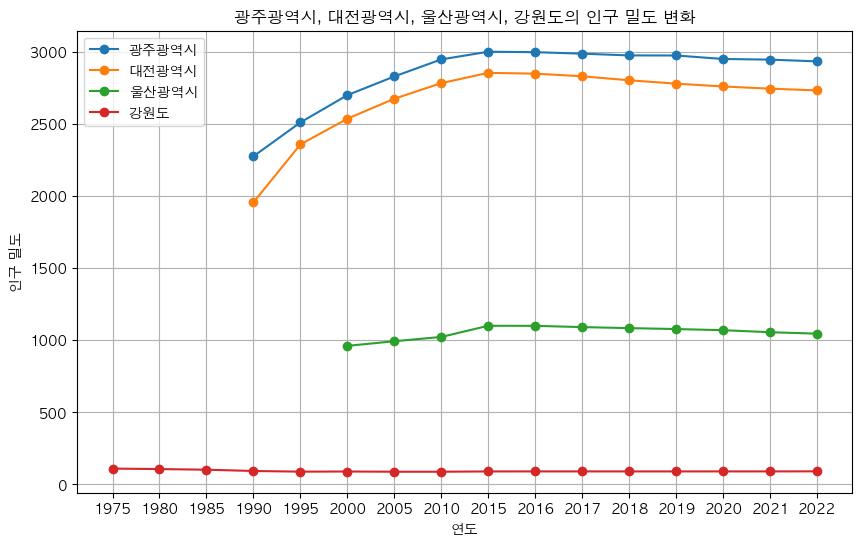

In [7]:
regions_to_plot = ['광주광역시','대전광역시', '울산광역시', '강원도']
filtered_df = density_df.loc[regions_to_plot]
filtered_df = filtered_df.drop(columns='변화율')

plt.figure(figsize=(10, 6))

for region in filtered_df.index:
    plt.plot(filtered_df.columns, filtered_df.loc[region], marker='o', label=region)


plt.xlabel('연도')
plt.ylabel('인구 밀도')
plt.title('광주광역시, 대전광역시, 울산광역시, 강원도의 인구 밀도 변화')
plt.legend()
plt.grid(True)
plt.show()

대전,광주는 1990년과 2022를 비교했을때는 인구 밀도가 상승했지만, 2015부터는 하락하는 추세이다.
울산도 2000년부터 2015까지 상승을 보였지만 그 이후로 하락세이다.
강원도는 상승,하락을 따지는 것이 큰 의미가 없는 정도로 큰 변화가 없다.

따라서 대전, 울산, 강원도를 increasing_regions에서 지우고 대전, 울산은 decreasing_regions에 추가했다

In [8]:
regions_to_remove = ['대전광역시', '울산광역시', '강원도', '광주광역시']
for region in regions_to_remove:
    if region in increasing_regions:
        increasing_regions.remove(region)
        
regions_to_add = ['울산광역시', '대전광역시', '광주광역시']
for region in regions_to_add:
    decreasing_regions.append(region)

In [9]:
print(increasing_regions)
print(decreasing_regions)

['세종특별자치시', '경기도', '제주특별자치도', '충청남도', '충청북도', '인천광역시']
['경상북도', '대구광역시', '경상남도', '전라북도', '서울특별시', '부산광역시', '전라남도', '울산광역시', '대전광역시', '광주광역시']


In [10]:
population_df.head()

,행정구역별(읍면동),항목,단위,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,2022 년,Unnamed: 11
0,전국,총인구[명],명,51069375,51269554,51422507,51629512,51779203,51829136,51738071,51692272,NaN
1,전국,남자[명],명,25608502,25696987,25768055,25877195,25952070,25915207,25850044,25835298,NaN
2,전국,여자[명],명,25460873,25572567,25654452,25752317,25827133,25913929,25888027,25856974,NaN
3,전국,내국인-계[명],명,49705663,49855796,49943260,49977951,50000285,50133493,50088104,49939926,NaN
4,전국,내국인-남자[명],명,24819839,24881520,24922392,24931554,24934662,24972588,24943537,24866514,NaN


population_df는 행정구역마다 연령별, 성별에 대한 인구 데이터가 
2015년도부터 2022년까지 있는 데이터이다. 

1966년부터 2010년까지 인구총조사 데이터도 존재하지만 크롤링 데이터는 보통 현재의 상황을 대변하기 때문에 비교적 최근 데이터를 사용하기로 결정했다.

# 가설1 : 인구 집중은 일자리와 연관성이 있을 것이다.

수도권에 인구가 집중되는 것은 일자리가 수도권에 몰려있는 것이 영향을 준다고 생각했다.

따라서 채용 사이트의 순위가 높은 공고들의 채용 위치를 확인해본다면 대부분이 인구가 많은 곳으로 몰려있을 것이라고 예상했다.

채용 사이트는 JOBKOREA를 사용했고, 크롤링은 리스틀리를 사용했다.

모든 공고를 다 크롤링하여 사용하기는 힘들기 때문에 '인사,HR','개발,데이터','교육','기획,전략','디자인','마케팅,광고,MD','엔지니어링,설계','영업','회계,세무','고객상담,TM' 10개 분야의 신입 공고 top 100을 사용했다. 

크롤링된 데이터를 확인했을 때 의미를 확인할 수 있는 부분은 다음과 같다

[등수, 등수 유지 여부, 회사 이름, 관심기업, 스크랩, 모집 이름, 직군, 신입 or 경력, 학력, 위치, 정규직 or 계약직, 지원 방법, 채용 날짜, 등수 상승, 하락치, 1000대기업 or 우수기업]

나머지 컬럼들은 의미가 딱히 없는 컬럼이기도 하고, non-zero value가 너무 희소하기 때문에 제외하기로 결정하였다

또한 데이터의 컬럼이 크롤링된 순서가 다 달라서 각각의 데이터를 보고 동일한 데이터 컬럼명으로 할당한 다음 합쳐주었다.

In [11]:
IT_df = pd.read_csv("개발_데이터_100.csv")
Planning_df = pd.read_csv("기획_전략_100.csv")
MD_df = pd.read_csv("마케팅_광고_MD_100.csv")
Sales_df = pd.read_csv("영업_100.csv")
Accounting_df = pd.read_csv("회계_세무_100.csv")
Engineering_df = pd.read_csv("엔지니어링_100.csv")
Design_df = pd.read_csv("디자인_100.csv")
Education_df = pd.read_csv("교육_100.csv")
HR_df = pd.read_csv("HR_100.csv")
TM_df = pd.read_csv("TM_100.csv")

In [12]:
IT_df_ = IT_df.iloc[:, 0:18]

new_column_names_IT = {'LABEL-1':'등수', 'LABEL-2':'등수_유지', 'LABEL-3':'회사_이름',
                    'LABEL-4':'관심기업', 'LABEL-5':'스크랩', 'LABEL-6':'모집_이름',
                    'LABEL-7':'직군1', 'LABEL-8':'직군2', 'LABEL-9':'직군3', 'LABEL-10':'직군4',
                    'LABEL-11':'경력_여부', 'LABEL-12':'학력', 'LABEL-13':'위치', 'LABEL-14':'정규직_or_계약직',
                       'LABEL-15':'지원_방법', 'LABEL-16':'채용_날짜', 'LABEL-17':'등수_상승_하락', 'LABEL-18':'1000대기업_or_우수기업'}

rename_IT_df_ = IT_df_.rename(columns=new_column_names_IT)

Planning_df_ = Planning_df.iloc[:, 0:20]
Sales_df_ = Sales_df.iloc[:, 0:20]
Accounting_df_ = Accounting_df.iloc[:, 0:20]
Engineering_df_ = Engineering_df.iloc[:, 0:20]

del Planning_df_['LABEL-6']
del Planning_df_['LABEL-7']

del Sales_df_['LABEL-6']
del Sales_df_['LABEL-7']

del Accounting_df_['LABEL-6']
del Accounting_df_['LABEL-7']

del Engineering_df_ ['LABEL-6']
del Engineering_df_ ['LABEL-7']

new_column_names_ = {'LABEL-1':'등수', 'LABEL-2':'등수_유지', 'LABEL-3':'회사_이름',
                    'LABEL-4':'관심기업', 'LABEL-5':'1000대기업_or_우수기업', 'LABEL-8':'스크랩', 'LABEL-9':'모집_이름', 'LABEL-10':'직군1',
                    'LABEL-11':'직군2', 'LABEL-12':'직군3', 'LABEL-13':'직군4', 'LABEL-14':'경력_여부',
                       'LABEL-15':'학력', 'LABEL-16':'위치', 'LABEL-17':'정규직_or_계약직', 'LABEL-18':'지원_방법', 'LABEL-19':'채용_날짜', 'LABEL-20':'등수_상승_하락'}

rename_Planning_df_ = Planning_df_.rename(columns=new_column_names_)
rename_Sales_df_ = Sales_df_.rename(columns=new_column_names_)
rename_Accounting_df_ = Accounting_df_.rename(columns=new_column_names_)
rename_Engineering_df_ = Engineering_df_.rename(columns=new_column_names_)

MD_df_ = MD_df.iloc[:, 0:20]

del MD_df_['LABEL-17']
del MD_df_['LABEL-18']

new_column_names_MD = {'LABEL-1':'등수', 'LABEL-2':'등수_유지', 'LABEL-3':'회사_이름',
                    'LABEL-4':'관심기업', 'LABEL-5':'스크랩', 'LABEL-6':'모집_이름',
                    'LABEL-7':'직군1', 'LABEL-8':'직군2', 'LABEL-9':'직군3',
                    'LABEL-10':'경력_여부', 'LABEL-11':'학력', 'LABEL-12':'위치', 'LABEL-13':'정규직_or_계약직',
                       'LABEL-14':'지원_방법', 'LABEL-15':'채용_날짜', 'LABEL-16':'1000대기업_or_우수기업', 'LABEL-19':'직군4', 'LABEL-20':'등수_상승_하락'}

rename_MD_df_ = MD_df_.rename(columns=new_column_names_MD)

Design_df_ = Design_df.iloc[:, 0:20]
Education_df_ = Education_df.iloc[:, 0:20]

del Design_df_['LABEL-17']
del Design_df_['LABEL-19']

del Education_df_['LABEL-17']
del Education_df_['LABEL-19']

new_column_names_Design = {'LABEL-1':'등수', 'LABEL-2':'등수_상승_하락', 'LABEL-3':'회사_이름',
                    'LABEL-4':'관심기업', 'LABEL-5':'스크랩', 'LABEL-6':'모집_이름',
                    'LABEL-7':'직군1', 'LABEL-8':'직군2', 'LABEL-9':'직군3',
                    'LABEL-10':'직군4', 'LABEL-11':'경력_여부', 'LABEL-12':'학력', 'LABEL-13':'위치',
                       'LABEL-14':'정규직_or_계약직', 'LABEL-15':'지원_방법', 'LABEL-16':'채용_날짜', 'LABEL-18':'등수_유지', 'LABEL-20':'1000대기업_or_우수기업'}

rename_Design_df_ = Design_df_.rename(columns=new_column_names_Design)
rename_Education_df_ = Education_df_.rename(columns=new_column_names_Design)

HR_df_ = HR_df.iloc[:, 0:21]

del HR_df_['LABEL-5']
del HR_df_['LABEL-7']
del HR_df_['LABEL-8']

new_column_names_HR = {'LABEL-1':'등수', 'LABEL-2':'등수_상승_하락', 'LABEL-3':'회사_이름',
                    'LABEL-4':'관심기업', 'LABEL-6':'1000대기업_or_우수기업', 'LABEL-9':'스크랩',
                    'LABEL-10':'모집_이름', 'LABEL-11':'직군1', 'LABEL-12':'직군2', 'LABEL-13':'직군3',
                       'LABEL-14':'직군4', 'LABEL-15':'경력_여부', 'LABEL-16':'학력', 'LABEL-17':'위치', 'LABEL-18':'정규직_or_계약직', 'LABEL-19':'지원_방법', 'LABEL-20':'채용_날짜', 'LABEL-21':'등수_유지'}

rename_HR_df_ = HR_df_.rename(columns=new_column_names_HR)

TM_df_ = TM_df.iloc[:, 0:20]

del TM_df_['LABEL-6']
del TM_df_['LABEL-7']

new_column_names_TM = {'LABEL-1':'등수', 'LABEL-2':'등수_상승_하락', 'LABEL-3':'회사_이름',
                    'LABEL-4':'관심기업', 'LABEL-5':'1000대기업_or_우수기업', 'LABEL-8':'스크랩',
                    'LABEL-9':'모집_이름', 'LABEL-10':'직군1', 'LABEL-11':'직군2', 'LABEL-12':'직군3',
                       'LABEL-13':'직군4', 'LABEL-14':'경력_여부', 'LABEL-15':'학력', 'LABEL-16':'위치', 'LABEL-17':'정규직_or_계약직', 'LABEL-18':'지원_방법', 'LABEL-19':'채용_날짜','LABEL-20':'등수_유지'}

rename_TM_df_ = TM_df_.rename(columns=new_column_names_TM)

In [13]:
# 똑같은 컬럼을 갖게된 데이터들을 하나의 데이터로 합쳐준다.
df = pd.concat([rename_IT_df_, rename_Planning_df_, rename_MD_df_, rename_Sales_df_, rename_Accounting_df_, rename_Engineering_df_, rename_Design_df_ , rename_TM_df_, rename_HR_df_, rename_Education_df_], ignore_index=True)

print(df.shape)

(1000, 18)


In [14]:
# 모집이름이 같은 공고는 다른 분야에서 중복되어 여러개의 데이터 행으로 수집된 것이다.
# 하나만 남기고 나머지는 삭제하는 것으로 결정했다.
column_to_check = '모집_이름'
duplicates = df.duplicated(subset=[column_to_check], keep=False)
duplicate_count = df.duplicated(subset=[column_to_check]).sum()
print("중복된 값 개수:", duplicate_count)

df_unique = df.drop_duplicates(subset=['모집_이름'], keep='first')

print(df_unique.shape)

# 모집_이름이 null 값인 행은 잘못 크롤링된 것이라고 간주하여 행을 삭제했다.
df_unique = df_unique.dropna(subset=['모집_이름'])

print(df_unique.shape)

중복된 값 개수: 379
(621, 18)
(620, 18)


전처리된 데이터 중 의미가 있다고 생각되는 ['회사_이름','모집_이름','위치','정규직_or_계약직','학력']만 선택했다.

크롤링된 데이터의 위치 컬럼값이 '서울, 경기, 충북 외' 이런식으로 되어있기 때문에 쉼표 단위로 나눠주고 ' 외'를 없애주었다. 

In [15]:
selected_columns = ['회사_이름','모집_이름','위치','정규직_or_계약직','학력']
df_selected = df_unique[selected_columns]

df_expanded = df_selected.assign(위치=df_selected['위치'].str.replace(' 외', '').str.split(', ')).explode('위치')

df_expanded.head()

,회사_이름,모집_이름,위치,정규직_or_계약직,학력
0,샘표식품㈜,2024 샘표식품 각 부문 수시 채용,서울,"정규직, 계약직",학력무관
0,샘표식품㈜,2024 샘표식품 각 부문 수시 채용,경기,"정규직, 계약직",학력무관
0,샘표식품㈜,2024 샘표식품 각 부문 수시 채용,충북,"정규직, 계약직",학력무관
1,㈜경동나비엔,[경동] 2024년 상반기 수시채용,서울,정규직,대졸↑
1,㈜경동나비엔,[경동] 2024년 상반기 수시채용,경기,정규직,대졸↑


In [16]:
unique_locations = df_expanded['위치'].unique()
print(unique_locations)

['서울' '경기' '충북' '대전' '인천' '전북' '세종' '충남' '광주' '대구' '제주' '울산' '부산' '경북'
 '전국' '아시아·중동' '전남' '일본' '경남' '중국·홍콩' '강원' '정규직' '인턴' '계약직' '미국']


In [17]:
# 지금 관심있는 것은 국내이기 때문에 국내가 아닌 다른 나라의 값이 나오는 행들은 삭제했고,
# 위치가 아닌 다른 값이 나온 행들도 크롤링이 잘못된 행이기 때문에 삭제하였다.

df_expanded= df_expanded[~df_expanded['위치'].isin(['정규직', '인턴', '계약직','전국','아시아·중동','일본','중국·홍콩', '미국'])]

In [18]:
#데이터 전처리가 끝난 후 위치 값이 몇개씩 나오는지 확인해보았다.
from collections import Counter

unique_locations = ['서울', '경기', '충북', '대전', '인천', '전북', '세종', '충남', '광주', '대구',
                    '제주', '울산', '부산', '경북', '전남', '경남', '강원']

location_counts = Counter(df_expanded['위치'])

for location in unique_locations:
    count = location_counts.get(location, 0)
    print(f"{location}: {count}개")

서울: 458개
경기: 270개
충북: 21개
대전: 25개
인천: 93개
전북: 8개
세종: 7개
충남: 31개
광주: 11개
대구: 8개
제주: 9개
울산: 10개
부산: 11개
경북: 10개
전남: 4개
경남: 8개
강원: 7개


In [19]:
population_df.columns

Index(['행정구역별(읍면동)', '항목', '단위', '2015 년', '2016 년', '2017 년', '2018 년',
       '2019 년', '2020 년', '2021 년', '2022 년', 'Unnamed: 11'],
      dtype='object')

In [20]:
population_df.head()

,행정구역별(읍면동),항목,단위,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,2022 년,Unnamed: 11
0,전국,총인구[명],명,51069375,51269554,51422507,51629512,51779203,51829136,51738071,51692272,NaN
1,전국,남자[명],명,25608502,25696987,25768055,25877195,25952070,25915207,25850044,25835298,NaN
2,전국,여자[명],명,25460873,25572567,25654452,25752317,25827133,25913929,25888027,25856974,NaN
3,전국,내국인-계[명],명,49705663,49855796,49943260,49977951,50000285,50133493,50088104,49939926,NaN
4,전국,내국인-남자[명],명,24819839,24881520,24922392,24931554,24934662,24972588,24943537,24866514,NaN


In [21]:
#추가적인 정보를 많이 가지고 있는 데이터라서 필요한 정보만 선택하였다
desired_regions = ['세종특별자치시', '경기도', '제주특별자치도', '충청남도', '광주광역시', 
                   '충청북도', '인천광역시', '강원도', '경상북도', '대구광역시', 
                   '경상남도', '전라북도', '서울특별시', '부산광역시', '전라남도', 
                   '울산광역시', '대전광역시']

filtered_df_p = population_df[
    (population_df['행정구역별(읍면동)'].isin(desired_regions)) & 
    (population_df['항목'] == '총인구[명]')
]

filtered_df_p = filtered_df_p.drop(columns='Unnamed: 11')
filtered_df_p = filtered_df_p.drop(columns='항목')
filtered_df_p = filtered_df_p.drop(columns='단위')
filtered_df_p.set_index('행정구역별(읍면동)', inplace=True)

filtered_df_p.head()

,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,2022 년
행정구역별(읍면동),,,,,,,,
서울특별시,9904312,9805506,9741871,9673936,9639541,9586195,9472127,9417469
부산광역시,3448737,3440484,3416918,3395278,3372692,3349016,3324335,3295760
대구광역시,2466052,2461002,2453041,2444412,2429940,2410700,2387911,2366852
인천광역시,2890451,2913024,2925967,2936117,2952237,2945454,2957044,2989125
광주광역시,1502881,1501557,1496172,1490092,1489730,1477573,1475262,1468972


In [22]:
#인구 데이터표와 같게 편집
density_df_p = density_df.iloc[:, 8:16]
density_df_p.head()

,2015,2016,2017,2018,2019,2020,2021,2022
행정구역별,,,,,,,,
세종특별자치시,439.0,521.7,595.0,671.9,727.3,761.3,787.7,822.9
경기도,1226.4,1244.4,1261.6,1286.2,1305.0,1325.3,1338.9,1344.9
제주특별자치도,327.5,337.1,346.9,355.8,359.4,362.6,363.8,365.6
충청남도,256.6,259.2,262.9,265.1,265.4,264.0,263.8,265.9
광주광역시,2998.8,2995.7,2985.3,2973.2,2972.7,2948.5,2944.0,2931.9


In [23]:
# 2015~2022년의 인구 데이터와 인구밀도 데이터를 이용하여 행정구역을 그룹화 할 것이다.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_combined = pd.concat([filtered_df_p, density_df_p], axis=1)

# 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_combined)

# cluster의 개수를 3으로 하면 서울, 경기, 나머지로 클러스터링이 된다.
# 인구와 일자리의 관계를 보기에는 클러스터가 3개인 경우는 의미없다고 판단하여 n을 4로 설정했다.
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_scaled)

cluster_labels = kmeans.labels_

df_combined['Cluster'] = cluster_labels

df_combined['Cluster']

서울특별시      2
부산광역시      3
대구광역시      3
인천광역시      3
광주광역시      3
대전광역시      3
울산광역시      0
세종특별자치시    0
경기도        1
강원도        0
충청북도       0
충청남도       0
전라북도       0
전라남도       0
경상북도       0
경상남도       0
제주특별자치도    0
Name: Cluster, dtype: int32

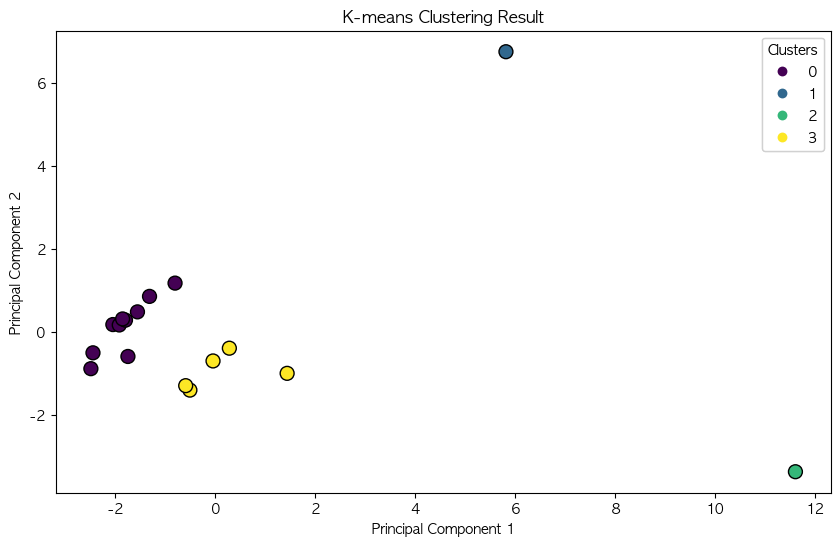

In [24]:
# 데이터 프레임끼리 클러스터링했기 때문에 시각화하기 힘들다.
# PCA를 이용하여 시각화했다.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['filtered_df_p', 'density_df_p'])
df_pca['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))

scatter = plt.scatter(df_pca['filtered_df_p'], df_pca['density_df_p'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.title('K-means Clustering Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

legend = plt.legend(*scatter.legend_elements(), title='Clusters')
plt.gca().add_artist(legend)

plt.show()

**< 클러스터 0 >**  상대적으로 인구 밀도와 인구 수가 적은 그룹

일자리 개수

[ 울산: 10개, 세종: 7개, 강원: 7개, 충북: 21개, 충남: 31개, 전북: 8개, 전남: 4개, 경북: 10개, 경남: 8개, 제주: 9개]



**< 클러스터 1 >**  인구 수가 제일 큰 구역

일자리 개수

[ 경기: 270개 ]



**< 클러스터 3 >**  상대적으로 인구 밀도와 인구 수가 큰 그룹

일자리 개수

[ 부산: 11개, 대구: 8개, 인천: 93개, 광주: 11개, 대전: 25개 ]



**< 클러스터 4 >**  인구 밀도가 제일 큰 구역

일자리 개수

[ 서울: 458개 ]

**< 인사이트 도출 >**

클러스터 1과 4를 봤을 때 대부분의 일자리가 경기와 서울에 몰려있는 것을 알 수 있다.

따라서 **인구 수와 인구 밀도는 일자리와 연관성이 있다**고 볼 수 있다. 

그러나 클러스터 0과 3 사이에는 큰 차이를 보이지 않는다.

따라서 이렇게 일자리가 모이게 된다면 앞으로 대도시 인구 집중보다는 **서울, 경기에 대한 인구 집중이 심각화** 될 것이다.

그룹내에서 **충남, 인천**이 높은 일자리 수요를 보인다.

충남은 수도권에 인접해있고, 교통이 좋아 수도권 접근성이 좋다. 또한 아산에 제조업, 자동차 산업 관련 공장의 밀집되어 있다. 이러한 것들이 일자리수가 많은 이유라고 볼 수 있다. 충남은 2015년부터 인구 밀도가 높아지고 있다.

인천에는 수도권 확장 과정에서 공업단지가 생겨났고, 도시 발전에 동반된 서비스업이 많이 발전하였다. 또한 제조업이 유명하다. 따라서 일자리가 많게 나타난다. 인천은 광역시 중 유일하게 인구 밀도가 증가하고 있는 광역시이다. 

따라서 **인구 집중을 완화하려면 서울, 경기가 아닌 다른 지역의 일자리 창출에 힘써야한다.**

일자리를 늘리기 위해서는 충남과 인천과 같이 **수도권과 인접하면서 발전 가능성이 있는 지역에 산업 육성이 필요하다.**

# 가설2 : 인구 수와 인구 밀도는 범죄율에 영향을 끼친다.

인구 집중의 문제점으로 지목되는 것 중 하나가 범죄율이다.

인구가 집중된 곳의 범죄율이 높아지면 많은 사람들의 일상 생활 속 불안감을 증대시키고 사회적 신뢰가 약해진다. 또한 지역 경제 전체에도 영향을 미칠 가능성이 있다. 

이러한 관련성이 있는지 인구밀도·인구 수와 범죄율에 대한 관계성을 확인해보려고 한다.

In [25]:
crime_df=pd.read_csv("crime_df_.csv")
crime_df_Gye=pd.read_csv("crime_df_Gye.csv")
crime_df_Sej=pd.read_csv("crime_df_Sej.csv")

데이터는 KOSIS 국가통계포털 지역별 범죄발생건수 데이터를 사용했다.

데이터는 지역별로 다른 엑셀파일로 존재하였기 때문에 지역의 데이터를 각각 다운받아 '발생건수'에 대한 데이터만 필터링한 후 합져서 csv파일을 만들었다. 기간은 최근 10개년인 2013~2022년도 데이터를 다운받았다. 

그 과정에서 경기도는 파일이 3가지로 나누어져 있었다. 2013\~2015년도 경기 데이터와 2016\~2022년도 경기남부, 경기북부 데이터로 분리되어 있었다.
경기남부, 경기북부 데이터는 컬럼의 형태가 같았기 때문에 하나의 파일로 합칠 수 있었지만
경기 데이터는 데이터의 형태가 다른 2개의 데이터와 달라서 합치는 데 실패했다.

세종 데이터는 2019년도부터 존재하고, 데이터의 형식이 다르기 때문에 다른 파일로 저장하였다

인구 데이터는 2015년부터 1년 단위로 존재하기 때문에 2015년 ~ 2022년 데이터를 사용하였다.

In [26]:
#데이터 전처리
crime_df = crime_df.fillna(0)
crime_df = crime_df.replace('-', 0)
years = ['2013 년', '2014 년', '2015 년', '2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2021 년', '2022 년']
crime_df[years] = crime_df[years].astype(int)
crime_df = crime_df[crime_df['죄종별'] == '총계']

crime_df_ = crime_df.iloc[:, 5:]
crime_df_.set_index('행정구역', inplace=True)
crime_df_.head()

,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,2022 년
행정구역,,,,,,,,
서울특별시,356575,343104,320193,308997,309269,296178,257969,279507
인천광역시,99915,100387,91385,86391,90608,88143,76584,82397
대전광역시,49593,49038,46988,45527,45167,44623,39982,43736
광주광역시,61234,54271,48213,43569,44274,43517,39392,38900
부산광역시,140700,129211,116449,110628,113138,113652,100439,105057


In [27]:
#3개의 데이터를 합치기 위해서 행정구역 인덱스를 컬럼으로 만들어 줌
density_df_p_ = density_df_p.reset_index()
filtered_df_p_ = filtered_df_p.reset_index()
crime_df_r = crime_df_.reset_index()

In [28]:
#3개의 데이터를 같은 형태로 만드는 과정
density_df_p_ = density_df_p_.melt(id_vars=['행정구역별'], var_name='연도', value_name='인구 밀도')
filtered_df_p_ = filtered_df_p_.melt(id_vars=['행정구역별(읍면동)'], var_name='연도', value_name='인구 수')
crime_df_r = crime_df_r.melt(id_vars=['행정구역'], var_name='연도', value_name='범죄 수')

filtered_df_p_['인구 수'] = filtered_df_p_['인구 수'].astype(float)

filtered_df_p_ = filtered_df_p_.rename(columns={'행정구역별(읍면동)': '행정구역'})
density_df_p_ = density_df_p_.rename(columns={'행정구역별': '행정구역'})

filtered_df_p_ = filtered_df_p_.assign(연도=filtered_df_p_['연도'].str.replace(' 년', '').explode('연도'))
crime_df_r = crime_df_r.assign(연도=crime_df_r['연도'].str.replace(' 년', '').explode('연도'))

In [29]:
#다른 형태인 경기도 데이터의 전처리
crime_df_Gye.loc[:, '행정구역'] = '경기도'
crime_df_Gye = crime_df_Gye[crime_df_Gye['죄종별'] == '총계']

crime_df_Gye_long = pd.melt(crime_df_Gye, 
                            id_vars=['행정구역'], 
                            value_vars=['2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2021 년', '2022 년'],
                            var_name='연도', 
                            value_name='범죄 수')

crime_df_Gye_long['연도'] = crime_df_Gye_long['연도'].str.replace(' 년', '').astype(int)


In [30]:
#다른 지역의 데이터에 경기도 데이터 병합
crime_df_r = pd.concat([crime_df_r, crime_df_Gye_long], ignore_index=True)

crime_df_r

,행정구역,연도,범죄 수
0,서울특별시,2015,356575
1,인천광역시,2015,99915
2,대전광역시,2015,49593
3,광주광역시,2015,61234
4,부산광역시,2015,140700
...,...,...,...
122,경기도,2018,388938
123,경기도,2019,394276
124,경기도,2020,394226
125,경기도,2021,357243


In [31]:
crime_df_Sej.loc[:, '행정구역'] = '세종특별자치시'
crime_df_Sej = crime_df_Sej[crime_df_Sej['죄종별(1)'] == '총계']

crime_df_Sej_long = pd.melt(crime_df_Sej, 
                            id_vars=['행정구역'], 
                            value_vars=['2019', '2020', '2021', '2022'],
                            var_name='연도', 
                            value_name='범죄 수')

In [32]:
#다른 지역의 데이터에 세종 데이터 병합
crime_df_r = pd.concat([crime_df_r, crime_df_Sej_long], ignore_index=True)

crime_df_r

,행정구역,연도,범죄 수
0,서울특별시,2015,356575
1,인천광역시,2015,99915
2,대전광역시,2015,49593
3,광주광역시,2015,61234
4,부산광역시,2015,140700
...,...,...,...
126,경기도,2022,364534
127,세종특별자치시,2019,6111
128,세종특별자치시,2020,6276
129,세종특별자치시,2021,5937


In [33]:
#인구 수, 인구 밀도, 범죄 수 데이터 병합
merged_df = pd.merge(filtered_df_p_, density_df_p_, on=['행정구역', '연도'])
merged_df = pd.merge(merged_df, crime_df_r, on=['행정구역', '연도'])

merged_df.head()

,행정구역,연도,인구 수,인구 밀도,범죄 수
0,서울특별시,2015,9904312.0,16364.0,356575
1,부산광역시,2015,3448737.0,4479.9,140700
2,대구광역시,2015,2466052.0,2791.0,98897
3,인천광역시,2015,2890451.0,2755.5,99915
4,광주광역시,2015,1502881.0,2998.8,61234


In [34]:
#'인구 수'와 '인구 밀도' 컬럼으로 '범죄 수'를 예측하려 했지만
#두 컬럼사이의 상관 관계가 의심 됨
correlation = merged_df['인구 수'].corr(merged_df['인구 밀도'])

print(f"인구 수와 인구 밀도의 상관관계: {correlation}")

인구 수와 인구 밀도의 상관관계: 0.9080745924372428


In [35]:
#두 컬럼이 높은 상관관계를 보이기 때문에 PCA로 하나의 컬럼으로 만들어 주기로 결정

numeric_columns = ['인구 수', '인구 밀도', '범죄 수']
df_numeric = merged_df[numeric_columns]

#PCA를 적용하기 전 데이터 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)
merged_df_ = merged_df
merged_df_ = pd.concat([merged_df[['행정구역', '연도']], df_scaled], axis=1)

pca = PCA(n_components=1)
principal_component = pca.fit_transform(merged_df_[['인구 수', '인구 밀도']])

merged_df_['PCA_Component'] = principal_component

merged_df_.head()

,행정구역,연도,인구 수,인구 밀도,범죄 수,PCA_Component
0,서울특별시,2015,3.623050,3.670539,4.183555,5.157346
1,부산광역시,2015,0.477575,0.580565,0.954166,0.748218
2,대구광역시,2015,-0.001237,0.141436,0.328813,0.099135
3,인천광역시,2015,0.205551,0.132205,0.344042,0.238830
4,광주광역시,2015,-0.470542,0.195466,-0.234608,-0.194508


회귀 계수: 0.6955382168606685
절편: -0.014756899044426126
평균 제곱 오차 (MSE): 0.0509475478595865
R^2 점수: 0.9585917203602444


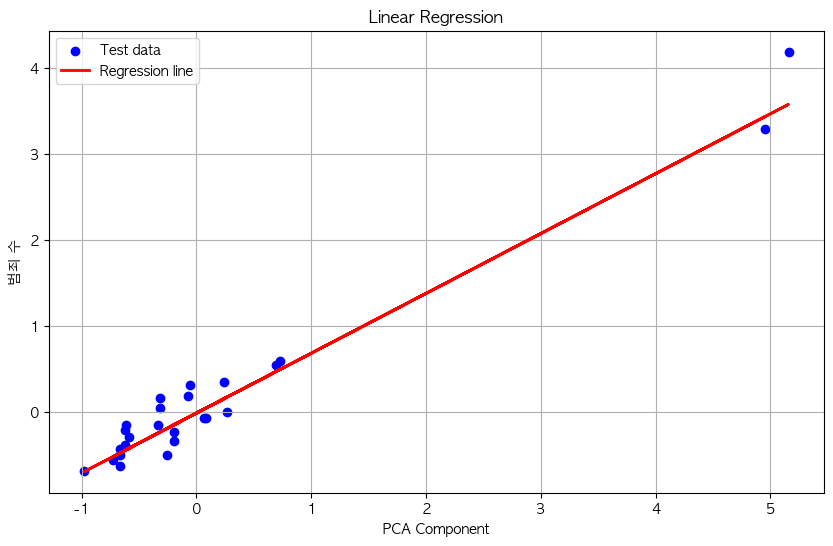

In [36]:
# 'PCA_Component'컬럼으로 '범죄 수' 컬럼 예측
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = merged_df_[['PCA_Component']]
y = merged_df_['범죄 수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
model = LinearRegression()
model.fit(X_train, y_train)

print(f'회귀 계수: {model.coef_[0]}')
print(f'절편: {model.intercept_}')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'평균 제곱 오차 (MSE): {mse}')
print(f'R^2 점수: {r2}')

plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='blue', label='Test data')

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

plt.title('Linear Regression')
plt.xlabel('PCA Component')
plt.ylabel('범죄 수')
plt.legend()
plt.grid(True)
plt.show()

모델 평가를 해석할 때 평균 제곱 오차는 두 개 이상의 모델이 있을 때 유의미한 해석을 할 수 있기 때문에 해석에서 제외한다.

R^2 점수는 1에 가까울수록 설명력이 높은 것을 나타낸다.
모델의 점수는 0.95로 모델이 전체 변동성의 약 95%를 설명할 수 있다는 것이다.
즉, 모델이 데이터를 굉장히 잘 대변하고 있다.

따라서 인구밀도·인구 수는 범죄율에 영향을 준다는 것을 알 수 있다.
인구밀도·인구 수와 범죄율은 정비례적 관계를 가지는 것도 알 수 있다.

**< 인사이트 도출 >**

인구 밀집으로 인한 범죄율 상승을 막기 위해, 도시 계획을 통해 인구를 보다 균등하게 분산시키는 전략이 필요하다. 

인구가 밀집된 지역에는 경찰 배치나 CCTV 설치 등으로 치안을 강화하는 것이 좋다.
경찰의 순찰 빈도를 늘리고, 경찰서를 추가로 설립하거나 파출소를 운영하여 즉각적인 대응이 가능하도록 해야 한다.

또한 인구 밀집 지역에서의 범죄 예방을 위한 사회적 서비스 및 프로그램의 강화가 필요하다. 예를 들어, 청소년 교육 프로그램, 심리 센터 운영 등을 통해 범죄 가능성을 낮출 수 있다. 

# 가설3 : 인구와 쓰레기 발생량에 관련이 있다.

인구 집중의 문제점으로 지목되는 것 중 하나가 쓰레기 발생량이다.

인구가 집중된 곳에서는 생활 쓰레기, 산업 쓰레기 등의 발생량이 급격히 증가한다. 이는 환경 오염을 유발하고, 쓰레기 처리 비용과 자원의 낭비를 초래한다. 또한 쓰레기 불법 투기로 인해 도시 미관을 해칠 수 있다.

인구 수와 쓰레기 발생량에 대한 관계성을 데이터를 통해 확인해보려고 한다.

자원순환마루의 2022년 전국 폐기물 발생 및 처리현황을 사용하였다.

In [37]:
trash_df = pd.read_csv("trash_df_.csv")

In [38]:
trash_df = trash_df[trash_df['폐기물 종류'] == '합계']
trash_df = trash_df[trash_df['시군구'] != '소계']
trash_df = trash_df.drop(columns='Unnamed: 3')
trash_df = trash_df.drop(columns='폐기물 종류')
trash_df = trash_df.drop(columns='기타')

trash_df.head()

,시도,시군구,합계,재활용,소각,매립
4,서울,종로구,"95,355.20","56,420.70","32,299.50","6,635.00"
8,서울,중구,"95,998.10","44,488.90","43,191.40","8,317.80"
12,서울,용산구,"87,049.00","50,275.00","30,262.70","6,511.30"
16,서울,성동구,"89,652.90","58,156.10","21,966.20","9,530.60"
20,서울,광진구,"80,103.20","55,322.70","16,185.10","8,595.40"


In [39]:
#인구 데이터와 쓰레기 데이터의 형식을 맞춰준다.
merged_df_a = pd.merge(filtered_df_p_, density_df_p_, on=['행정구역', '연도'])
merged_df_a = merged_df_a[merged_df_a['연도'] == '2022']
merged_df_a = merged_df_a.drop(columns='연도')
merged_df_a = merged_df_a.rename(columns={'행정구역': '시도'})


merged_df_a['시도'] = merged_df_a['시도'].replace({
    '서울특별시': '서울',
    '경상남도': '경남',
    '부산광역시': '부산',
    '대구광역시': '대구',
    '인천광역시': '인천',
    '광주광역시': '광주',
    '대전광역시': '대전',
    '울산광역시': '울산',
    '충청북도': '충북',
    '충청남도': '충남',
    '전라북도': '전북',
    '전라남도': '전남',
    '경상북도': '경북',
    '제주특별자치도': '제주',
    '강원도': '강원',
    '세종특별자치시': '세종',
    '경기도': '경기'
})

sorted_sido_list = merged_df_a.sort_values(by='인구 밀도', ascending=False)['시도'].tolist()

merged_df_a.head()

,시도,인구 수,인구 밀도
119,서울,9417469.0,15560.7
120,부산,3295760.0,4272.8
121,대구,2366852.0,2673.7
122,인천,2989125.0,2801.3
123,광주,1468972.0,2931.9


In [40]:
#인구 데이터와 쓰레기 데이터를 합쳐준다.
merged_df_ta = pd.merge(trash_df, merged_df_a, on='시도', how='left')
merged_df_ta['합계'] = merged_df_ta['합계'].str.replace(',', '').astype(float)
merged_df_ta['재활용'] = merged_df_ta['재활용'].str.replace(',', '').astype(float)
merged_df_ta['소각'] = merged_df_ta['소각'].str.replace(',', '').astype(float)
merged_df_ta['매립'] = merged_df_ta['매립'].str.replace(',', '').astype(float)


merged_df_ta.head()

,시도,시군구,합계,재활용,소각,매립,인구 수,인구 밀도
0,서울,종로구,95355.2,56420.7,32299.5,6635.0,9417469.0,15560.7
1,서울,중구,95998.1,44488.9,43191.4,8317.8,9417469.0,15560.7
2,서울,용산구,87049.0,50275.0,30262.7,6511.3,9417469.0,15560.7
3,서울,성동구,89652.9,58156.1,21966.2,9530.6,9417469.0,15560.7
4,서울,광진구,80103.2,55322.7,16185.1,8595.4,9417469.0,15560.7


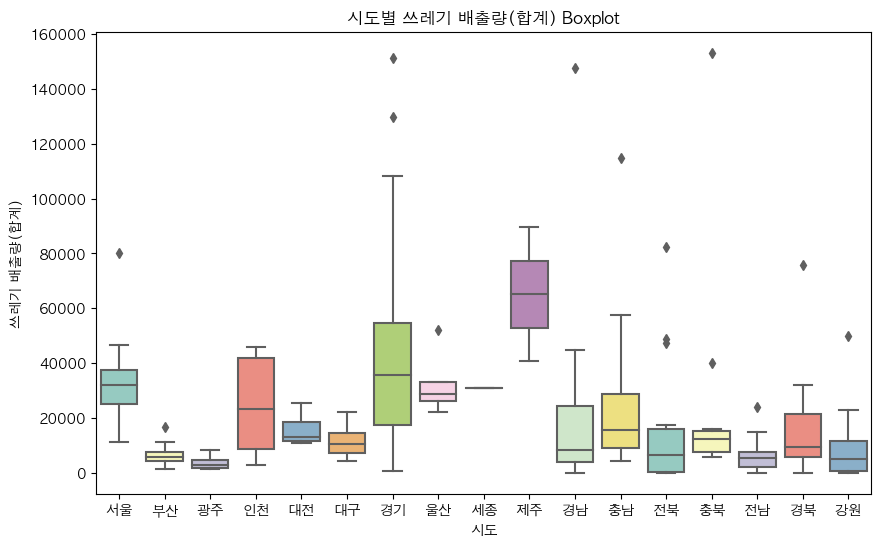

In [41]:
import seaborn as sns
from scipy.stats import f_oneway

# 시도별 쓰레기 배출량(합계)에 대한 Boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='시도', y='소각', data=merged_df_ta, order=sorted_sido_list, palette='Set3')
ax.set_title('시도별 쓰레기 배출량(합계) Boxplot')
ax.set_xlabel('시도')
ax.set_ylabel('쓰레기 배출량(합계)')
plt.show()

위의 box plot은 시도별 쓰레기 배출량에 대한 그래프이고, 인구 밀도가 높은 순에서 낮은 순으로 정렬한 것이다. '경기'와 '제주'를 제외한 '시도'에서 큰 경향성은 없어 보이지만 인구 밀도가 낮아질수록 box plot이 아래에 그려지는 것을 알 수 있다.



수치적 확인을 위해 인구 밀도가 차이나는 두 '시도'를 뽑아서 t-test를 진행시켰다. 

In [42]:
from scipy import stats

seoul_recycle = merged_df_ta[merged_df_ta['시도'] == '서울']['합계']
gyeongnam_recycle = merged_df_ta[merged_df_ta['시도'] == '강원']['합계']

#귀무 가설 : 서울과 강원 지역의 쓰레기 배출량의 평균은 차이가 없다.
t_statistic, p_value = stats.ttest_ind(seoul_recycle, gyeongnam_recycle)
print(f"서울과 강원 지역의 쓰레기 배출량 차이 검정 (합계):")
print(f"p-value: {p_value}")

print()

#귀무 가설 : 부산과 강븍 지역의 쓰레기 배출량(재활용)의 평균은 차이가 없다.
busan_recycle = merged_df_ta[merged_df_ta['시도'] == '부산']['재활용']
gyeongbuk_recycle = merged_df_ta[merged_df_ta['시도'] == '경북']['재활용']

t_statistic, p_value = stats.ttest_ind(busan_recycle, gyeongbuk_recycle)
print(f"부산과 경북 지역의 쓰레기 배출량 차이 검정 (재활용):")
print(f"p-value: {p_value:.4f}")

서울과 강원 지역의 쓰레기 배출량 차이 검정 (합계):
p-value: 2.1308084139870355e-09

부산과 경북 지역의 쓰레기 배출량 차이 검정 (재활용):
p-value: 0.0314


서울과 강원 사이의 p-value값은 매우 작은 값을 보인다. 부산과 경북 사이의 p-value값도 0.03으로 0.05보다 작은 값을 보인다.

따라서 귀무가설을 기각하여 인구 밀도 차이가 있는 두 지역 쓰레기 배출량의 평균에는 유의미한 차이가 있다. 이 차이는 우연에 의한 것이 아니라 통계적으로 유의미한 차이라고 할 수 있다.

**인사이트 도출**

인구 밀도가 높은 곳에 쓰레기 배출량이 높은 것은 통계적으로 유의미하다고 볼 수 있기 때문에 인구 밀도가 높은 지역에는 더 효율적인 쓰레기 관리 시스템이 필요하다. 쓰레기 수거 진도를 증가 시키거나, 더 많은 재활용 센터를 설치하는 등의 방법을 선택할 수 있다.

인구 밀도가 높은 지역은 쓰레기 배출량이 많아 처리 비용이 더 많이 들 수 있다.
따라서, 쓰레기 처리 비용을 공정하게 분담하기 위해 지역별로 차등 요금을 부과하는 정책을 고려할 수 있다.